In [1]:
import os
data_dirpath = '/usr2/scratch/fanfic/ao3_harrypotter_text/'
fandom_dirpath = '/usr2/mamille2/fanfiction-project/data/ao3/harrypotter/'

# Get popular character mods

In [2]:
import pandas as pd
from collections import Counter

metadata_path = os.path.join(data_dirpath, 'stories.csv')

metadata = pd.read_csv(metadata_path)
all_tags = [t.lower() for l in metadata['additional tags'].map(lambda x: eval(x)) for t in l]
tag_ctr =  Counter(all_tags)

In [6]:
from pprint import pprint
import re

char_tag_ctr = {}

for character in [r'\bharry\b', r'\bron\b', r'\bhermione\b', r'\bsnape\b', r'\bdraco\b', r'\bvoldemort\b']:
#     char_tag_ctr[character] = [(tag, count) for (tag,count) in tag_ctr.items() if character in tag]
    char_tag_ctr[character] = [(tag, count) for (tag,count) in tag_ctr.items() if re.search(character, tag)]
    pprint(sorted(char_tag_ctr[character], key=lambda x: x[1], reverse=True)[:100])
    print()

[('harry potter next generation', 1572),
 ('alternate universe - harry potter setting', 1098),
 ('female harry potter', 978),
 ('book 7: harry potter and the deathly hallows', 900),
 ('auror harry potter', 749),
 ('harry potter - freeform', 729),
 ('master of death harry potter', 712),
 ('book 6: harry potter and the half-blood prince', 624),
 ('book 5: harry potter and the order of the phoenix', 570),
 ('dark harry', 559),
 ('powerful harry', 517),
 ('slytherin harry', 504),
 ('bottom harry', 502),
 ('top harry', 463),
 ('book 4: harry potter and the goblet of fire', 438),
 ('harry potter epilogue what epilogue | ewe', 411),
 ('book 3: harry potter and the prisoner of azkaban', 340),
 ("book 1: harry potter and the philosopher's stone", 335),
 ('dark harry potter', 321),
 ('order of the phoenix (harry potter)', 318),
 ('slytherin harry potter', 314),
 ('pov harry potter', 307),
 ('bottom harry potter', 306),
 ('top harry potter', 281),
 ('smart harry', 261),
 ('harry potter au', 226),

[('good severus snape', 407),
 ('severus snape lives', 368),
 ('bottom severus snape', 172),
 ('young severus snape', 163),
 ('mentor severus snape', 127),
 ('severus snape has a heart', 120),
 ('snape lives', 111),
 ('pov severus snape', 98),
 ('lily evans potter & severus snape friendship', 93),
 ('severus snape adopts harry potter', 65),
 ('severus snape - freeform', 50),
 ('mentor snape', 49),
 ('top severus snape', 49),
 ('bottom!snape', 44),
 ('severus snape fest 2016', 43),
 ('bottom snape', 38),
 ('snape - freeform', 33),
 ('parent severus snape', 33),
 ('headmaster severus snape', 32),
 ('sub severus snape', 32),
 ('creature severus snape', 29),
 ('dom severus snape', 29),
 ('vampire severus snape', 26),
 ('severus snape-centric', 26),
 ('severus snape bashing', 24),
 ('dark severus snape', 24),
 ('pregnant severus snape', 24),
 ('female severus snape', 23),
 ('protective severus snape', 22),
 ('jealous severus snape', 22),
 ('snape adopts harry', 19),
 ('snape bashing', 18),


## Alignment changes

In [7]:
import re

alignment_change = {} # char: [alignment change patters]
bad_terms = ['dark', 'bad', 'evil']
good_terms = ['good', 'redeemed', 'nice']

good_chars = ['harry', 'ron', 'hermione', ]
bad_chars = ['snape', 'draco']

for char in good_chars:
    alignment_change[char] = bad_terms
for char in bad_chars:
    alignment_change[char] = good_terms

In [8]:
# Calculate max #fics for characters

fic_counts = 0

selected_char_tags = {}

exclude_list = ['lovegood', 'badass', 'unredeemed', 'not', "n't", 'voltron', 'dirtybadwrong', 'neville', 'pronouns', 'strong']

for char in good_chars + bad_chars:
    selected_char_tags[char] = [(tag,count) for (tag,count) in char_tag_ctr[char] if \
                                not any([e in tag for e in exclude_list]) and \
                                any([w in tag for w in alignment_change[char]]) and count>1]
#     selected_char_tags[char] = [(tag,count) for (tag,count) in char_tag_ctr[char]]
    fic_counts += sum([count for tag,count in selected_char_tags[char]])
    
print(fic_counts)
selected_char_tags

KeyError: 'harry'

# Basic stats on sents/paras length

In [8]:
import numpy as np

# Load fanfic text

fanfic_fpath = '/usr0/home/jfiacco/Research/fanfic/merged_data/fanfic.harry_potter.au.train.lower.txt.cat'

with open(fanfic_fpath) as f:
    fanfic_paras = f.read().splitlines()
    
fanfic_para_lengths = [len(p.split()) for p in fanfic_paras]
print(f"Number of paragraphs: {len(fanfic_paras)}")
print(f"Maximum fanfic paragraph length: {max(fanfic_para_lengths)}")
print(f"Average fanfic paragraph length: {np.mean(fanfic_para_lengths)}")

1195120
Number of paragraphs: 1195120
Maximum fanfic paragraph length: 4953
Average fanfic paragraph length: 38.741425965593415


In [9]:
import os

# Load canon

canon_dirpath = '/usr0/home/jfiacco/Research/fanfic/canon_data/harry_potter_tokenized/'

fnames = os.listdir(canon_dirpath)

canon_paras = []

for fname in fnames:
    fpath = os.path.join(canon_dirpath, fname)
    with open(fpath) as f:
        canon_paras.extend(f.read().splitlines())
    

canon_para_lengths = [len(p.split()) for p in canon_paras]
print(f"Number of canon paragraphs: {len(canon_paras)}")
print(f"Maximum canon paragraph length: {max(canon_para_lengths)}")
print(f"Average canon paragraph length: {np.mean(canon_para_lengths)}")

Number of paragraphs: 38721
Maximum canon paragraph length: 291
Average canon paragraph length: 35.965393455747524


# Group tags by AO3 organization

## Build normalization dict

In [4]:
# Load metadata split fic IDs
import os
import pandas as pd

# fic_ids = {}
metadata = {}

for fold in ['train', 'dev', 'test']:
    
    metadata[fold] = pd.read_csv(os.path.join(fandom_dirpath, f'metadata_{fold}.csv'))
    print(len(metadata[fold]))
    
#     with open(os.path.join(fandom_dirpath, f'fic_ids_{fold}.txt')) as f:
#         lines = f.read().splitlines()
#         fic_ids[fold] = sorted([int(l) for l in lines])
#     print(len(fic_ids[fold]))

49951
6244
6244


In [5]:
# Get tags for folds
tags = {}

for fold in ['train', 'dev', 'test']:
    tags[fold] = metadata[fold].set_index('fic_id').to_dict()['additional tags']
    print(len(tags[fold].keys()))

    tags[fold] = {key: [tag for tag in eval(val)] for key,val in tags[fold].items()}

49951
6244
6244


In [6]:
# Get top 100 tags

from collections import Counter

tag_ctr = Counter([tag for l in tags['train'].values() for tag in l])
tag_vocab = {}
tag_vocab[100] = [a for a,b in tag_ctr.most_common(100)]
tag_vocab[100]

['Romance',
 'Angst',
 'Fluff',
 'Humor',
 'Alternate Universe',
 'Hurt/Comfort',
 'Drama',
 "Marauders' Era",
 'One Shot',
 'Friendship',
 'Established Relationship',
 'Alternate Universe - Canon Divergence',
 'Anal Sex',
 'Slash',
 'Sexual Content',
 'Explicit Language',
 'Crossover',
 'Smut',
 'Plot What Plot/Porn Without Plot',
 'Post-Hogwarts',
 'Hogwarts',
 'Post-War',
 'Family',
 'Oral Sex',
 'Explicit Sexual Content',
 'AU',
 'First Time',
 'HP: EWE',
 'Fluff and Angst',
 'Christmas',
 'Tragedy',
 'Blow Jobs',
 'Hogwarts Eighth Year',
 'First Kiss',
 'Canon Compliant',
 'Mpreg',
 'Crack',
 'Out of Character',
 'Marauders',
 'Masturbation',
 'Voyeurism',
 'Kissing',
 'Rimming',
 'Emotional Hurt/Comfort',
 'Love',
 'wolfstar',
 'Alternate Universe - Modern Setting',
 'Pre-Slash',
 'Anal Fingering',
 'Dubious Consent',
 'Dirty Talk',
 'Time Travel',
 'Drarry',
 'Parody',
 'Character Death',
 'Friends to Lovers',
 'Harry Potter Next Generation',
 'Dark',
 'Magic',
 'Angst with a Ha

In [34]:
import urllib.request
import urllib.parse
import html
from bs4 import BeautifulSoup
from IPython.core.debugger import set_trace

metatags = {} # tag: [metatag/canonical tag] for tag normalization

url_base = 'https://archiveofourown.org/tags/{}'
# for tag in ['Alternate Universe - Modern Setting']:
# for tag in ['Alternate Universe - Canon Divergence']:
# for tag in ['Alternate Universe - canon divergent']:
# for tag in ['Anal Sex']:
for tag in tag_vocab[100]:
#     print(tag)

    orig_tag = tag
    
    # Get HTML
#     url = url_base.format(html.escape(tag.replace('/', '*s*')))
#     if tag == 'Emotional Hurt/Comfort':
#         set_trace()
#     if '/' in tag:
#         url = url_base.format(html.escape(tag.replace('/', '*s*')))
#     else:
#         url = url_base.format(tag)
    url = url_base.format(urllib.parse.quote(tag, safe=''))
    print(url)
    page = str(urllib.request.urlopen(url).read())
    
    if '<h3 class="heading">Mergers</h3>' in page: # has been merged
        soup = BeautifulSoup(page, 'html.parser') 
        canonical_tag = soup.find('div', {'class': 'merger module'}).p.a.text
        
        tag = canonical_tag # check if canonical tag has meta tag
        url = url_base.format(urllib.parse.quote(tag, safe=''))
        page = str(urllib.request.urlopen(url).read())
        
    if 'Meta tags:' in page:
        soup = BeautifulSoup(page, 'html.parser') 
        
        all_metatags = [el.text for el in soup.find('h3', string='Meta tags:').next_sibling.next_sibling.find_all('a', {'class': 'tag'})]
        toplevel_metatags = set([el.a.text for el in soup.find('h3', string='Meta tags:').next_sibling.next_sibling.find_all('ul')])
        rm_indices = [i-1 for i, tag in enumerate(all_metatags) if tag in toplevel_metatags]

        # # Remove bottom-level metatags if have a corresponding toplevel
        metatags[orig_tag] = set([tag for i, tag in enumerate(all_metatags) if not i in rm_indices])

    else: # already top-level tag
        metatags[orig_tag] = set([tag])
        
    print(f"{orig_tag}: {metatags[orig_tag]})")
        
metatags

https://archiveofourown.org/tags/Romance
Romance: {'Romance'})
https://archiveofourown.org/tags/Angst
Angst: {'Angst'})
https://archiveofourown.org/tags/Fluff
Fluff: {'Fluff'})
https://archiveofourown.org/tags/Humor
Humor: {'Humor'})
https://archiveofourown.org/tags/Alternate%20Universe
Alternate Universe: {'Alternate Universe'})
https://archiveofourown.org/tags/Hurt%2FComfort
Hurt/Comfort: {'Hurt/Comfort'})
https://archiveofourown.org/tags/Drama
Drama: {'Drama'})
https://archiveofourown.org/tags/Marauders%27%20Era
Marauders' Era: {'Marauders Era (Harry Potter)'})
https://archiveofourown.org/tags/One%20Shot
One Shot: {'One Shot'})
https://archiveofourown.org/tags/Friendship
Friendship: {'Friendship'})
https://archiveofourown.org/tags/Established%20Relationship
Established Relationship: {'Relationship(s)'})
https://archiveofourown.org/tags/Alternate%20Universe%20-%20Canon%20Divergence
Alternate Universe - Canon Divergence: {'Deviates From Canon', 'Alternate Universe', 'Alternate Canon'}

{'AU': {'Alternate Universe'},
 'Action/Adventure': {'Action/Adventure'},
 'Age Difference': {'Age Difference'},
 'Alternate Universe': {'Alternate Universe'},
 'Alternate Universe - Canon Divergence': {'Alternate Canon',
  'Alternate Universe',
  'Deviates From Canon'},
 'Alternate Universe - Harry Potter Setting': {'Alternate Universe',
  'Crossovers & Fandom Fusions'},
 'Alternate Universe - Hogwarts': {'Alternate Universe',
  'Crossovers & Fandom Fusions'},
 'Alternate Universe - Modern Setting': {'Alternate Universe', 'Modern Era'},
 'Alternate Universe - Non-Magical': {'Alternate Universe'},
 'Anal Fingering': {'Fingerfucking', 'Sexual Content'},
 'Anal Sex': {'Sexual Content'},
 'Angst': {'Angst'},
 'Angst with a Happy Ending': {'Angst', 'Happy Ending'},
 'BDSM': {'BDSM'},
 'Blow Jobs': {'Sexual Content'},
 'Bondage': {'BDSM'},
 'Canon Compliant': {'Canon Universe'},
 'Canonical Character Death': {'Death'},
 'Character Death': {'Death'},
 'Character Study': {'Character Study'},


In [30]:
from pprint import pprint
# toplevel_metatags = [el.li for el in soup.find('h3', string='Meta tags:').next_sibling.next_sibling.find_all('li')] # super metadata
# toplevel_metatags = [el for el in soup.find('h3', string='Meta tags:').next_sibling.next_sibling.find_all('li')] # super metadata
all_metatags = [el.text for el in soup.find('h3', string='Meta tags:').next_sibling.next_sibling.find_all('a', {'class': 'tag'})]
toplevel_metatags = set([el.a.text for el in soup.find('h3', string='Meta tags:').next_sibling.next_sibling.find_all('ul')])
rm_indices = [i-1 for i, tag in enumerate(all_metatags) if tag in toplevel_metatags]
pprint(toplevel_metatags)
pprint(all_metatags)
print(rm_indices)

# # Remove bottom-level metatags if have a corresponding toplevel
metatags = set([tag for i, tag in enumerate(all_metatags) if not i in rm_indices])
metatags

{'Sexual Content'}
['Sex', 'Sexual Content', 'Anal', 'Sexual Content']
[0, 2]


{'Sexual Content'}

In [40]:
normalized_tags = set([x for l in metatags.values() for x in l])
print(len(normalized_tags))
normalized_tags

74


{'Abuse',
 'Action/Adventure',
 'Age Difference',
 'Alternate Canon',
 'Alternate Universe',
 'Angst',
 'BDSM',
 'Canon Universe',
 'Character Study',
 'Community: HPFT',
 'Community: daily_deviant',
 'Consent',
 'Crack',
 'Crossovers & Fandom Fusions',
 'Dark',
 'Death',
 'Deviates From Canon',
 'Drabble',
 'Drama',
 'Drarry',
 'Erotica',
 'Family',
 'Female Characters',
 'Fingerfucking',
 'Firsts',
 'Fluff',
 'Friendship',
 'Getting Together',
 'Happy Ending',
 'Harm to Children',
 'Hogwarts',
 'Hogwarts Era',
 'Holidays',
 'Humor',
 'Hurt/Comfort',
 'Incest',
 'Infidelity',
 'Kissing',
 'Language',
 'Loss',
 'Love',
 'Marauders',
 'Marauders Era (Harry Potter)',
 'Modern Era',
 'Music',
 'Next Generation',
 'Not Epilogue Compliant',
 'One Shot',
 'Out of Character',
 'Parody',
 'Pining',
 'Porn',
 'Post-Battle of Hogwarts',
 'Post-Canon',
 'Post-Hogwarts',
 'Post-War',
 'Pregnancy',
 'Quidditch',
 'Relationship(s)',
 'Romance',
 'Roughness',
 'Sad',
 'Sexual Content',
 'Slash',
 'Sm

In [42]:
# Save normalization dict
import pickle

with open(os.path.join(fandom_dirpath, 'tag_normalization.pkl'), 'wb') as f:
    pickle.dump(metatags, f)

## Normalize tags

In [46]:
metadata['train'].loc[:, ['top100_tags']]

,top100_tags
0,"['Angst', 'Drama']"
1,['Incest']
2,['Canon Compliant']
3,"['Slash', 'Humor', 'Parody', 'Romance']"
4,"['Slash', 'Explicit Language', 'Out of Charact..."
5,['Drarry']
6,['Canonical Character Death']
7,[]
8,"['Friendship', 'Character Study']"
9,"['Canonical Character Death', 'One Shot', 'Cha..."


In [53]:
for fold in ['train', 'dev', 'test']:
    metadata[fold]['top100_tags_normalized'] = metadata[fold]['top100_tags'].map(lambda x: [t for l in [metatags[tag] for tag in eval(x) if isinstance(x, str)] for t in l])

In [56]:
pd.set_option('display.max_colwidth', -1)
metadata['train'].loc[:, ['top100_tags', 'top100_tags_normalized']]

,top100_tags,top100_tags_normalized
0,"['Angst', 'Drama']","[Angst, Drama]"
1,['Incest'],[Incest]
2,['Canon Compliant'],[Canon Universe]
3,"['Slash', 'Humor', 'Parody', 'Romance']","[Slash, Humor, Parody, Romance]"
4,"['Slash', 'Explicit Language', 'Out of Character', 'Sexual Content']","[Slash, Language, Out of Character, Sexual Content]"
5,['Drarry'],[Drarry]
6,['Canonical Character Death'],[Death]
7,[],[]
8,"['Friendship', 'Character Study']","[Friendship, Character Study]"
9,"['Canonical Character Death', 'One Shot', 'Character Study', 'Drama', 'Dark']","[Death, One Shot, Character Study, Drama, Dark]"


In [57]:
for fold in ['train', 'dev', 'test']:
    metadata[fold].to_csv(os.path.join(fandom_dirpath, f'metadata_{fold}.csv'), index=False)

# Add in column with top 100 tags to 5k dataset

In [61]:
# Load fold split fic IDs
import os

fic_ids = {}

for fold in ['train', 'dev', 'test']:
    with open(os.path.join(dirpath_5k, f'fic_ids_{fold}.txt')) as f:
        lines = f.read().splitlines()
        fic_ids[fold] = sorted([int(l) for l in lines])
    print(len(fic_ids[fold]))

2196
274
275


In [62]:
# Load metadata
metadata = pd.read_csv('/usr2/scratch/fanfic/ao3_harrypotter_text/stories.csv')
# metadata.fic_id.dtype
print(len(metadata))
print(metadata.columns)

179407
Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes'],
      dtype='object')


In [63]:
# Get tags for folds
tags = {}
metadata_split = {}

for fold in ['train', 'dev']:
    metadata_split[fold] = metadata.loc[metadata['fic_id'].isin(fic_ids[fold]), ['fic_id', 'additional tags']]

    tags[fold] = metadata_split[fold].set_index('fic_id').to_dict()['additional tags']
    print(len(tags[fold].keys()))

    tags[fold] = {key: [tag for tag in eval(val)] for key,val in tags[fold].items()}

2196
274


In [64]:
# Get top 100 tags

from collections import Counter

tag_ctr = Counter([tag for l in tags['train'].values() for tag in l])
tag_vocab = {}
tag_vocab[100] = [a for a,b in tag_ctr.most_common(100)]
tag_vocab[100]

['Fluff',
 'Angst',
 'Established Relationship',
 'Alternate Universe - Canon Divergence',
 'Hurt/Comfort',
 'Anal Sex',
 'Smut',
 'Alternate Universe',
 'Humor',
 'Romance',
 'Hogwarts Eighth Year',
 'First Kiss',
 'Alternate Universe - Modern Setting',
 'One Shot',
 'wolfstar',
 'Kissing',
 "Marauders' Era",
 'Plot What Plot/Porn Without Plot',
 'Fluff and Angst',
 'AU',
 'PWP',
 'Anal Fingering',
 'Hogwarts',
 'Drarry',
 'HP: EWE',
 'Happy Ending',
 'Oral Sex',
 'Pining',
 'Crack',
 'Friendship',
 'Emotional Hurt/Comfort',
 'Alternate Universe - Hogwarts',
 'Friends to Lovers',
 'Rimming',
 'Mpreg',
 'Blow Jobs',
 'Time Travel',
 'Fluff and Smut',
 'Alternate Universe - Non-Magical',
 'Child Abuse',
 'Dirty Talk',
 'Alternate Universe - Harry Potter Setting',
 'First Time',
 'Crossover',
 'Masturbation',
 'Angst with a Happy Ending',
 'Rough Sex',
 'Slow Burn',
 'Drabble',
 'Hand Jobs',
 'Quidditch',
 'Alternate Universe - Muggle',
 'Magic',
 'Getting Together',
 'Christmas',
 'Comi

In [72]:
# Add in column

metadata_split = {}

for fold in ['train', 'dev', 'test']:
    fpath = os.path.join(dirpath_5k, f'metadata_{fold}.csv')
    metadata_split[fold] = pd.read_csv(fpath)
    metadata_split[fold]['top100_tags'] = metadata['additional tags'].map(lambda x: [tag for tag in eval(x) if tag in tag_vocab[100]])
    metadata_split[fold].to_csv(fpath, index=False)

# Create 5k dataset with fics with 5k words max

## Merge chapters into fics

In [4]:
# Load fold split fic IDs
import os

fic_ids = {}

for fold in ['train', 'dev', 'test']:
    with open(os.path.join(dirpath_100k, f'{fold}_fic_ids.txt')) as f:
        lines = f.read().splitlines()
        fic_ids[fold] = sorted([int(l) for l in lines])
    print(len(fic_ids[fold]))

4771
597
597


In [8]:
# Concatenate chapter features into fics
from tqdm import tqdm_notebook as tqdm

for fold in ['train', 'dev', 'test']:
    chapter_fnames = os.listdir(os.path.join(dirpath_100k, fold))
    
    for fic_id in tqdm(fic_ids[fold]):
        fic_chapters = sorted([ch for ch in chapter_fnames if str(fic_id)==ch.split('_')[0]])
        fic_text = []
        
        for fic_chapter in fic_chapters:
            
            # Load chapter text
            with open(os.path.join(dirpath_100k, fold, fic_chapter)) as f:
                chapter_text = f.read().splitlines()
                fic_text += chapter_text
            
        # Write out
        with open(os.path.join(dirpath_100k, 'fics', f'{fic_id}.txt'), 'w') as f:
            for line in fic_text:
                f.write(line + '\n')

## Make, split 5k dataset

In [10]:
# Load metadata
import pandas as pd

metadata = pd.read_csv(os.path.join(data_dirpath, 'stories.csv'))
# metadata.fic_id.dtype
print(len(metadata))
print(metadata.columns)

179407
Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes'],
      dtype='object')


In [14]:
fic_ids_100k = [fid for l in fic_ids.values() for fid in l]
len(fic_ids_100k)

5965

In [15]:
metadata_100k = metadata.loc[metadata['fic_id'].isin(fic_ids_100k), ['fic_id', 'words']]
len(metadata_100k)

5965

In [26]:
# Filter by #words
fic_ids_5k = sorted(metadata_100k.loc[metadata_100k['words'] <= 5000, 'fic_id'].values.tolist())
print(len(fic_ids_5k))
fic_ids_5k[:10]

2745


[35061, 41065, 41068, 52634, 102138, 161250, 161252, 161274, 161276, 161277]

In [27]:
# Save fic ids
with open(os.path.join(dirpath_5k, 'fic_ids.txt'), 'w') as f:
    for fid in fic_ids_5k:
        f.write(str(fid)+'\n')

In [28]:
# Split fic ids into folds
import numpy as np
fic_ids_5k_split = {}

# Shuffle
np.random.shuffle(fic_ids_5k)

# Split
fic_ids_5k_split['train'], fic_ids_5k_split['dev'], fic_ids_5k_split['test'] = \
        np.split(fic_ids_5k, [int(.8*len(fic_ids_5k)), int(.9*len(fic_ids_5k))])

for fold in fic_ids_5k_split:
    print(len(fic_ids_5k_split[fold]))

2196
274
275


In [29]:
# Save split fic ids
for fold in fic_ids_5k_split:
    with open(os.path.join(dirpath_5k, f'fic_ids_{fold}.txt'), 'w') as f:
        for fid in fic_ids_5k_split[fold]:
            f.write(str(fid)+'\n')

In [30]:
from tqdm import tqdm_notebook as tqdm
import shutil

for fold in ['train', 'dev', 'test']:
    print(fold)
    for fic_id in tqdm(fic_ids_5k_split[fold]):
        
        # Copy fic
        shutil.copy(os.path.join(dirpath_100k, 'fics', f'{fic_id}.txt'), 
                    os.path.join(dirpath_5k, fold, f'{fic_id}.txt'))

train



dev



test


## Save 5k split tags

In [33]:
for fold, fic_ids in fic_ids_5k_split.items():
    
    fold_metadata = metadata[metadata['fic_id'].isin(fic_ids)]
    print(len(fold_metadata))
    
    # Save fold metadata
    fold_metadata.to_csv(os.path.join(dirpath_5k, f'metadata_{fold}.csv'), index=False)

2196
274
275


# Look at training test distribution of tags

In [6]:
# Load fold split fic IDs
import pandas as pd
import os

fic_ids = {}

split_dirpath = '/usr2/mamille2/fanfiction-project/data/ao3/harrypotter/'

for fold in ['train', 'dev']:
    with open(os.path.join(split_dirpath, f'{fold}_fic_ids.txt')) as f:
        lines = f.read().splitlines()
        fic_ids[fold] = sorted([int(l) for l in lines])
    print(len(fic_ids[fold]))

4771
597


In [7]:
# Load metadata
metadata = pd.read_csv('/usr2/scratch/fanfic/ao3_harrypotter_text/stories.csv')
# metadata.fic_id.dtype
print(len(metadata))
print(metadata.columns)

179407
Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes'],
      dtype='object')


In [8]:
# Get tags for folds
tags = {}
metadata_split = {}

for fold in ['train', 'dev']:
    metadata_split[fold] = metadata.loc[metadata['fic_id'].isin(fic_ids[fold]), ['fic_id', 'additional tags']]

    tags[fold] = metadata_split[fold].set_index('fic_id').to_dict()['additional tags']
    print(len(tags[fold].keys()))

    tags[fold] = {key: [tag.lower() for tag in eval(val)] for key,val in tags[fold].items()}

4771
597


In [9]:
# Get top 100 tags

from collections import Counter

tag_ctr = Counter([tag for l in tags['train'].values() for tag in l])
tag_vocab = {}
tag_vocab[100] = [a for a,b in tag_ctr.most_common(100)]
tag_vocab[100]

['fluff',
 'angst',
 'alternate universe - canon divergence',
 'hurt/comfort',
 'slow burn',
 'romance',
 'anal sex',
 'alternate universe',
 'smut',
 'humor',
 'au',
 'fluff and angst',
 'alternate universe - modern setting',
 'established relationship',
 'hogwarts eighth year',
 'hogwarts',
 "marauders' era",
 'time travel',
 'hp: ewe',
 'anal fingering',
 'drarry',
 'happy ending',
 'friendship',
 'friends to lovers',
 'mpreg',
 'crossover',
 'first time',
 'first kiss',
 'pining',
 'oral sex',
 'rimming',
 'angst with a happy ending',
 'wolfstar',
 'alternate universe - hogwarts',
 'blow jobs',
 'other additional tags to be added',
 'kissing',
 'emotional hurt/comfort',
 'magic',
 'implied/referenced child abuse',
 'one shot',
 'quidditch',
 'child abuse',
 'alternate universe - harry potter setting',
 'dumbledore bashing',
 'slash',
 'female harry potter',
 'plot what plot/porn without plot',
 'mutual pining',
 'post-hogwarts',
 'dirty talk',
 'alternate universe - soulmates',
 'p

In [10]:
# Plot distribution of top 100 tags (#stories that have those tags)
tag_ctr.most_common(100)

[('fluff', 755),
 ('angst', 488),
 ('alternate universe - canon divergence', 317),
 ('hurt/comfort', 260),
 ('slow burn', 246),
 ('romance', 218),
 ('anal sex', 217),
 ('alternate universe', 200),
 ('smut', 196),
 ('humor', 187),
 ('au', 159),
 ('fluff and angst', 154),
 ('alternate universe - modern setting', 151),
 ('established relationship', 150),
 ('hogwarts eighth year', 143),
 ('hogwarts', 138),
 ("marauders' era", 135),
 ('time travel', 124),
 ('hp: ewe', 124),
 ('anal fingering', 122),
 ('drarry', 120),
 ('happy ending', 119),
 ('friendship', 119),
 ('friends to lovers', 118),
 ('mpreg', 116),
 ('crossover', 113),
 ('first time', 108),
 ('first kiss', 107),
 ('pining', 104),
 ('oral sex', 101),
 ('rimming', 101),
 ('angst with a happy ending', 100),
 ('wolfstar', 99),
 ('alternate universe - hogwarts', 98),
 ('blow jobs', 97),
 ('other additional tags to be added', 96),
 ('kissing', 92),
 ('emotional hurt/comfort', 91),
 ('magic', 87),
 ('implied/referenced child abuse', 85),


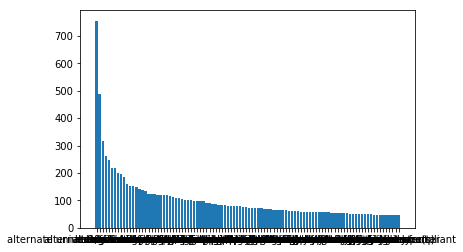

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar([a for a,b in tag_ctr.most_common(100)], [b for a,b in tag_ctr.most_common(100)])
plt.show()

# Train/dev/test split fics

In [76]:
# Load files, get fic IDs

fic_ids = set()

for fname in os.listdir(os.path.join(para_dirpath, 'fics')):
    fic_ids.add(fname.split('_')[0])
    
fic_ids = list(fic_ids)
len(fic_ids)

35818

In [51]:
import numpy as np

# Shuffle
np.random.shuffle(fic_ids)

# Split
train, dev, test = np.split(fic_ids, [int(.8*len(fic_ids)), int(.9*len(fic_ids))])
print(len(train))
print(len(dev))
print(len(test))

4774
597
597


In [38]:
train[:100]

array(['6874807', '8793700', '12902652', '7722616', '15838335', '3458153',
       '7519285', '2378180', '13490070', '12926859', '10794081', '607339',
       '782314', '8435428', '14461707', '11605263', '11256465', '15818769',
       '12173901', '12246120', '2220429', '15069470', '6121357',
       '13279866', '14427993', '11236329', '620111', '9337694', '14962394',
       '1790539', '9140548', '1032054', '8687077', '13850862', '12269997',
       '3889237', '4905367', '10758525', '11611539', '10760664', '8793700',
       '3558710', '689365', '6555610', '2611883', '6685723', '3374381',
       '10889535', '5344055', '11571243', '7606468', '10589658', '585155',
       '7356304', '7407136', '9619868', '1643708', '11996958', '5063110',
       '12540468', '4716347', '5013064', '13486242', '8671843', '10608648',
       '7067200', '10978020', '9472409', '14063925', '5124476', '14161812',
       '15338505', '10494132', '11740872', '7215586', '14981177',
       '15301383', '410533', '10023854', '1

In [47]:
test[:100]

array(['2588804', '15643263', '528487', '6053377', '14920538', '14369391',
       '16367873', '11611539', '15425523', '14753663', '14384850',
       '1019251', '10350147', '11378733', '3595716', '8665645', '2273616',
       '429025', '3502418', '4430621', '13679598', '11721735', '11217111',
       '3383882', '13747413', '12805845', '10374135', '12826443',
       '15216785', '16272431', '8175197', '10361034', '8641240', '2423987',
       '4572786', '374911', '12044190', '4570407', '2370179', '4840652',
       '14188728', '11650530', '9885926', '9500819', '9215741', '7557562',
       '11256399', '4121866', '6895717', '13224567', '11767326',
       '12992835', '11235936', '14229615', '2497955', '9054610',
       '14034414', '5611336', '12020133', '4422662', '7987327', '13176687',
       '892956', '1649498', '1155472', '926514', '1155472', '6866074',
       '4809158', '9895496', '2703395', '8055868', '1155472', '14593281',
       '16105160', '5238752', '6632236', '12540852', '9847772', '82

In [43]:
type(train[0])

numpy.str_

In [52]:
from tqdm import tqdm_notebook as tqdm

for fname in tqdm(os.listdir(para_dirpath)):
    if fname in ['train', 'test', 'dev']:
        continue
    fic_id = fname.split('_')[0]
    
    if fic_id in train:
        os.rename(os.path.join(para_dirpath, fname), os.path.join(para_dirpath, 'train', fname))
    elif fic_id in dev:
        os.rename(os.path.join(para_dirpath, fname), os.path.join(para_dirpath, 'dev', fname))
    elif fic_id in test:
        os.rename(os.path.join(para_dirpath, fname), os.path.join(para_dirpath, 'test', fname))
        
    else:
        print(fic_id)

In [54]:
# Print out train, test, dev fic_ids

with open(os.path.join(para_dirpath, f'train_fic_ids.txt'), 'w') as f:
    for fic_id in sorted(train):
        f.write(f"{fic_id}\n")
        
with open(os.path.join(para_dirpath, f'dev_fic_ids.txt'), 'w') as f:
    for fic_id in sorted(dev):
        f.write(f"{fic_id}\n")
        
with open(os.path.join(para_dirpath, f'test_fic_ids.txt'), 'w') as f:
    for fic_id in sorted(test):
        f.write(f"{fic_id}\n")

# Basic stats on Harry Potter AO3 collection

In [5]:
import pandas as pd

stories = pd.read_csv(os.path.join(data_dirpath, 'stories.csv'))
print(len(stories))
print(stories.columns)

179407
Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes'],
      dtype='object')


In [8]:
pd.set_option('display.max_colwidth', -1)

In [10]:
stories.loc[:,['hits', 'words', 'additional tags']].head(20)

,hits,words,additional tags
0,2773.0,8389.0,"[""pre-HBP""]"
1,27154.0,15688.0,"[""Alternate Universe"", ""Alternate Universe - Canon Divergence"", ""Episode Tag""]"
2,4880.0,14921.0,"[""Suicide Attempt""]"
3,6690.0,26476.0,"[""Harry Potter is Voldemort's Child"", ""Harry is Harrison Riddle"", ""Three types of people"", ""Two Types of Faunus"", ""Hounds bonded to huntsmen""]"
4,279.0,8861.0,"[""Yona of the Dawn retelling"", ""High Fantasy"", ""Alternate Universe"", ""Spoilers"", ""Yona of the Dawn"", ""myth building"", ""supernatural and magic!"", ""teen for now"", ""no major character deaths (yet)"", ""not super graphic or violent yet either"", ""Unrequited Love"", ""altered ages""]"
5,816.0,257.0,"[""Slash"", ""Justification"", ""Unhealthy Relationships"", ""Dark Arts""]"
6,2517.0,8938.0,"[""Infidelity"", ""Background Het"", ""Anal Sex""]"
7,1323.0,338.0,"[""Potions"", ""Potions Accident"", ""unapologetic fluff"", ""Prelude to Smut""]"
8,272.0,711.0,"[""Best Friends"", ""Implied Sexual Content"", ""are you joking?"", ""What Was I Thinking?"", ""Sexual Humor"", ""WTF"", ""Inspired by Music"", ""Quintuple Drabble"", ""Please Don't Kill Me""]"
9,731.0,1390.0,"[""Ficlet"", ""Angst"", ""Drama""]"


In [12]:
# total number of words
stories['words'].sum()

1601006008.0

## Tag vocabulary

In [25]:
tag_lists = stories['additional tags'].map(lambda x: eval(x.lower()))
len(tag_lists)

179407

In [26]:
all_tags = [x for l in tag_lists for x in l]
len(all_tags)

897364

In [27]:
# empty tags
len([l for l in tag_lists if len(l) > 0])

149465

In [28]:
unique_tags = set(all_tags)
len(unique_tags)

168243

In [32]:
from collections import Counter

tag_counts = Counter(all_tags)

for threshold in [5, 10, 20, 50]:
    print(f'{threshold}: {len([t for t,count in tag_counts.items() if count >= threshold])}')

5: 10737
10: 6365
20: 3881
50: 1910


## Filtering

Filter fics by:
* Minimum #words
* Contain at least 1 tag that occurs more than 50 times
* Minimum #hits (optional)

# Preprocessing

* Figure out if punctuation is messed up (space after full stops)
* spaCy tokenization
* 1 sentence/line, file for each fic